# $$Peoople~Analytics:Recrutamento$$


## $$Conceito:$$

**People Analytics é um método de gestão de pessoas baseado na coleta e análise de dados sobre os funcionários de uma empresa. Essa "análise de pessoas" torna o RH mais estratégico, otimizando processos, diminuindo o turnover, aumentando a atração de talentos e mais**



**Seu objetivo é melhorar a qualidade da tomada de decisão sobre os profissionais a partir da coleta e do cruzamento de informações relacionadas a eles. Assim, é possível tanto reconhecer um funcionário que se destaca quanto identificar problemas que estejam ocorrendo, como baixa produtividade, pouco engajamento, insatisfação, alto índice de rotatividade, entre outros**

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$  

## $$Ajudar~ o ~RH ~a ~recrutar~ melhor~ através~das~ variáveis,~ para ~evitar~ pedidos~ de ~demissões$$

In [1]:
# Pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Base de Dados 

In [2]:
# Carrega os dados
dados = pd.read_csv("dados/dataset.csv")
dados

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,AgeStartedWorking
0,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
1,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
2,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
3,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
4,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23053,34,Current employee,Travel_Rarely,Research & Development,27,2,Medical,4,Female,3,...,0,9,3,3,3,2,1,2,Company Website,25
23054,37,Current employee,Travel_Frequently,Research & Development,9,3,Medical,3,Female,3,...,3,3,5,3,3,2,1,2,Jora,34
23055,55,Current employee,Non-Travel,Research & Development,8,1,Medical,4,Female,3,...,0,31,3,3,2,0,2,2,Recruit.net,24
23056,27,Current employee,Travel_Rarely,Research & Development,16,4,Technical Degree,4,Male,3,...,1,7,2,3,6,2,1,2,Company Website,20


**Dataset contém 23.058 registros e 30 variáveis.**

# Dicionário de Dados



- **Age** = Idade dos Funcionários


- **Attrition** = Decisão Tomada pelo funcionário, são 3 Labels: Pedir demissão voluntaria, ser demitido ou continuar na empresa, essa é a variável Target.


- **BusinessTravel** = Se o funcionário viaja ou não pela empresa.


- **Department** = Departamento onde o funcionário trabalha.


- **DistanceFromHome** = Distancia da casa ao trabalho.


- **Education** = Nível de Escolaridade do funcionário.


- **EducationField** = Área de Escolaridade do funcionário.


- **EnvironmentSatisfaction** = Nível de satisfação do ambiente


- **Gender** = Gênero: Masculino ou Feminino.


- **JobInvolvement** = Nível de envolvimento no trabalho.


- **JobLevel** = Nível do trabalho.


- **JobRole** = Tipo de função no trabalho.


- **JobSatisfaction** = Nível de Satisfação no trabalho.


- **MaritalStatus** = Estado civil do funcionário.


- **MonthlyIncome** = Valor do salário mensal.


- **NumCompaniesWorked** = Número de empresas que já trabalhou


- **OverTime** = Se o funcionário faz hora extra ou não.


- **PercentSalaryHike** = Percentual de aumento salarial.


- **PerformanceRating** = Nível de performance da empresa dada pelo funcionário.


- **RelationshipSatisfaction** = Nível de satisfação no relacionamento do funcionário. 


- **StockOptionLevel** = Nível de participações acionárias do funcionário com a empresa.


- **TotalWorkingYears** = Total de anos já trabalhado


- **TrainingTimesLastYear** = Tempo em anos desde o último treinamento.


- **WorkLifeBalance** = Nível de equilíbrio entre trabalho e vida pessoal do funcionário.


- **YearsAtCompany** = Anos trabalhados na empresa


- **YearsInCurrentRole** = Tempo em anos na mesma função


- **YearsSinceLastPromotion** = Tempo em anos desde a última promoção


- **YearsWithCurrManager** = Tempo em anos trabalhando com o mesmo Gerente.


- **Employee Source** = Como o funcionário foi encontrado pela empresa: Indicação, site ,etc.


- **AgeStartedWorking** = Idade que começou a trabalhar na empresa.



# Análise Exploratória

In [3]:
# Verificar se existe valores nulos
dados.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Employee Source             0
AgeStartedWorking           0
dtype: int64

**Não temos variáveis com valores nulos**

In [4]:
#Verificar se existe dados duplicados
sum(dados.duplicated())

14882

**Apesar do dataset haver muitos dados duplicados, não vamos remove-los, pois eles representam mais da metade dos dados**

In [5]:
# Verifica o total de valores únicos por coluna
dados.nunique()

Age                           43
Attrition                      3
BusinessTravel                 3
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
Employee Source                9
AgeStartedWorking             61
dtype: int

In [6]:
# Tipos de dados nas colunas
dados.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Employee Source     

**Temos várias variáveis categóricas que temos que transforma-las em one-hot-encoder para não cometermos erros de ponderação arbitraria**

In [7]:
#Transformando as variáveis categoricas em One-Hot-Encoding
data = pd.get_dummies(dados,prefix=['BusinessTravel'], columns = ['BusinessTravel'])
data = pd.get_dummies(data,prefix=['Department'], columns = ['Department'])
data = pd.get_dummies(data,prefix=['Education'], columns = ['Education'])
data = pd.get_dummies(data,prefix=['EducationField'], columns = ['EducationField'])
data = pd.get_dummies(data,prefix=['EnvironmentSatisfaction'], columns = ['EnvironmentSatisfaction'])
data = pd.get_dummies(data,prefix=['Gender'], columns = ['Gender'])
data = pd.get_dummies(data,prefix=['JobInvolvement'], columns = ['JobInvolvement'])
data = pd.get_dummies(data,prefix=['JobLevel'], columns = ['JobLevel'])
data = pd.get_dummies(data,prefix=['JobRole'], columns = ['JobRole'])
data = pd.get_dummies(data,prefix=['JobSatisfaction'], columns = ['JobSatisfaction'])
data = pd.get_dummies(data,prefix=['MaritalStatus'], columns = ['MaritalStatus'])
data = pd.get_dummies(data,prefix=['OverTime'], columns = ['OverTime'])
data = pd.get_dummies(data,prefix=['PerformanceRating'], columns = ['PerformanceRating'])
data = pd.get_dummies(data,prefix=['RelationshipSatisfaction'], columns = ['RelationshipSatisfaction'])
data = pd.get_dummies(data,prefix=['StockOptionLevel'], columns = ['StockOptionLevel'])
data = pd.get_dummies(data,prefix=['WorkLifeBalance'], columns = ['WorkLifeBalance'])
data = pd.get_dummies(data,prefix=['Employee Source'], columns = ['Employee Source'])


#Label Encoder
from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()
data['Attrition'] = label_enc.fit_transform(data['Attrition'])
data['Attrition']

data.head(5)

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,WorkLifeBalance_4,Employee Source_Adzuna,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,41,2,1,5993,8,11,8,0,6,4,...,0,0,0,0,0,0,0,0,1,0
1,37,2,6,5993,8,11,8,0,6,4,...,0,0,0,0,0,0,0,0,1,0
2,41,2,1,5993,4,11,8,0,6,4,...,0,0,0,0,0,0,0,0,1,0
3,37,2,6,5993,5,11,8,0,6,4,...,0,0,0,0,0,0,0,0,1,0
4,37,2,6,5993,8,11,8,0,6,4,...,0,0,0,0,0,0,0,0,1,0


In [8]:
#Shape 
data.shape

(23058, 86)

**Com as transformações das variáveis, Criamos 58 novas variáveis**

## Engenharia de Atributos:

### Criar a variável que mostra o tempo de experiência dos funcionários em outras empresas

- Total de anos trabalhados - total de anos na empresa atual

In [9]:
#Criaremos uma coluna de anos anteriores de experiência do funcionário.
data['PriorYearsOfExperience']= data.TotalWorkingYears - data.YearsAtCompany

#Verificar os 5 ultimos registross
data['PriorYearsOfExperience'].to_frame().tail(5)

,PriorYearsOfExperience
23053,6
23054,0
23055,29
23056,1
23057,5


**Com essa variável vamos conseguir visualizar melhor o perfil de experiência do funcionário e tirar melhores insights em relação ao turnover da empresa**

### Criar a variável que mostra a taxa de estabilidade, com base nos empregos anteriores

- Anos trabalhados em outras empresas / numero de empresas que já trabalhou

In [10]:
#Criar variável
data['AverageTenure']=data.PriorYearsOfExperience / data.NumCompaniesWorked
data['AverageTenure'].describe()

count    22686.0
mean         inf
std          NaN
min          0.0
25%          0.0
50%          1.0
75%          4.0
max          inf
Name: AverageTenure, dtype: float64

**Note que foi gerado varios valores INF e NaN, pois muitas funcionários nunca trabalharam antes de entrar na empresa, temos que substituir esses registros por 0**

In [11]:
#Alterando os valores INF por 0
data.loc[data.AverageTenure > 29, 'AverageTenure'] = 0

#Alterando os valores NaN
data[data.AverageTenure.isnull()]=0

In [12]:
data['AverageTenure'].describe()

count    23058.000000
mean         1.728911
std          3.760196
min          0.000000
25%          0.000000
50%          0.333333
75%          1.500000
max         29.000000
Name: AverageTenure, dtype: float64

**Agora os valores INF e NaN foram substituídos por 0, visualizando os dados concluímos que na média os funcionários não ficam mais de 2 anos nas empresas, porém esse insight pode estar enviesado, pois temos varios funcionários tendo sua primeira oportunidade de emprego na empresa**

## Plot para análise da variável Target

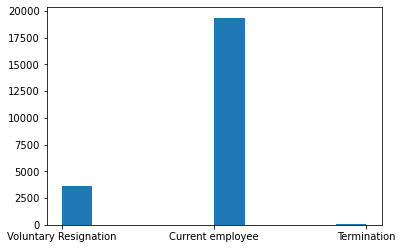

In [13]:
#Plot da variável target
plt.hist(dados.Attrition);

In [14]:
Termination = len(dados[dados.Attrition=='Termination'])
Current_employee = len(dados[dados.Attrition=='Current employee'])
Resignation = len(dados[dados.Attrition=='Voluntary Resignation'])

print(f'Demissões por parte da empresa = {round(Termination/len(dados)*100,1)}')
print(f'Funcionarios Ativos na empresa = {round(Current_employee/len(dados)*100,1)}')
print(f'Pedido de demissão = {round(Resignation/len(dados)*100,1)}')

Demissões por parte da empresa = 0.4
Funcionarios Ativos na empresa = 84.0
Pedido de demissão = 15.6


**O objetivo principal do RH é diminuir o número de demissões dos funcionários, vamos selecionar as principais variáveis que vão ajudar nesta tomada de decisão**

**Como a classe 'Termination' tem apenas 4% na base de dados ela será excluída para darmos foco somente nas classes relevantes**

In [15]:
#Excluir a classe 'Termination'
dados = dados[dados.Attrition!='Termination']
data =    data[data.Attrition!=1]


# Modelagem:

## Selecionar as variáveis mais importantes usando o  Algoritimo Random Forest

- Como o dataset possui muitas variáveis explicativa, vamos selecionar as mais relevantes para a tomada de decisão

In [16]:
#Selecionar as variáveis mais importantes
from sklearn.ensemble import RandomForestClassifier

#Selecionar as variáveis X e Y
x  = data.drop('Attrition', 1)
y = data['Attrition']


#Modelo RandomForest
modelo = RandomForestClassifier(n_estimators=1000)

#Treinamento do modelo
fit = modelo.fit(x,y)

In [17]:
#Valor da importancia de cada Feature
valor_imp = fit.feature_importances_
valor_imp = pd.DataFrame(valor_imp,index = x.columns,columns=['importance']).sort_values('importance',ascending=False)
valor_imp.head(40)

,importance
Age,0.080450
AgeStartedWorking,0.062395
DistanceFromHome,0.055677
MonthlyIncome,0.055113
TotalWorkingYears,0.036363
PercentSalaryHike,0.033896
YearsAtCompany,0.030921
PriorYearsOfExperience,0.025355
YearsWithCurrManager,0.025231
YearsInCurrentRole,0.025062


**Vamos selecionar as variáveis com o valor de importância > 0.02 para analise**

**OBS: Esse critério quem decide é o cientista de dados, com base em experimentações poderíamos ter escolhido outros valores**

In [18]:
#Selecionar as variáveis mais importantes
valor_imp_1 = valor_imp[valor_imp.importance>0.02].index

#Filtrar no dataset
var_importance = data[valor_imp_1]
var_importance

,Age,AgeStartedWorking,DistanceFromHome,MonthlyIncome,TotalWorkingYears,PercentSalaryHike,YearsAtCompany,PriorYearsOfExperience,YearsWithCurrManager,YearsInCurrentRole,TrainingTimesLastYear,YearsSinceLastPromotion
0,41,33,1,5993,8,11,6,2,5,4,0,0
1,37,29,6,5993,8,11,6,2,5,4,0,0
2,41,33,1,5993,8,11,6,2,5,4,0,0
3,37,29,6,5993,8,11,6,2,5,4,0,0
4,37,29,6,5993,8,11,6,2,5,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23053,34,25,27,2311,9,15,3,6,2,2,3,1
23054,37,34,9,3760,3,15,3,0,2,2,5,1
23055,55,24,8,10008,31,14,2,29,2,0,3,2
23056,27,20,16,2991,7,11,6,1,2,2,2,1


**Selecionamos as variáveis mais relevantes usando o algoritimo Random Forest**

## Verificar se há diferença nas medias de cada variável em relação a variável target

**Difinir as classes da variável target**

- **Classe 0** = Current employee


- **Classe 2** = Voluntary Resignation



### Age

In [19]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['Age'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['Age'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')



Classe 0 = 36.96
Classe 2 = 33.93


**Há uma pequena diferença na média de idade dos funcionários em relação ao pedido de demissão, quanto mais novo mais propicio a pedir demissão**

### AgeStartedWorking

In [20]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['AgeStartedWorking'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['AgeStartedWorking'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 25.76
Classe 2 = 24.42


**Não há diferença significativa na idade que o funcionário começou a trabalhar em relação ao pedido de demissão**

### DistanceFromHome

In [21]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['DistanceFromHome'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['DistanceFromHome'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 8.77
Classe 2 = 10.55


**Há uma pequena diferença na distância da casa para o trabalho em relação ao pedido de demissão, pois o funcionário que mora mais longe tem mais chance de pedir demissão**

### MonthlyIncome

In [22]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['MonthlyIncome'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['MonthlyIncome'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 6479.63
Classe 2 = 5506.71


**Há uma diferença significativa quando comparamos a média de salário com pedido de demissão, fica evidente que quem ganha menos tem mais pretensão de pedir demissão do que um funcionário que ganha mais, uma das causas pode ser que o funcionário que ganha menos encontrou outra empresa que paga um salário maior**

### TotalWorkingYears

In [23]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['TotalWorkingYears'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['TotalWorkingYears'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 11.2
Classe 2 = 9.51


**Há uma pequena diferença em relação ao total de anos trabalhados (empresa atual + empresas anteriores), pois os funcionários que tem mais tempo de serviço, tem mesmo pretensão de pedir demissão, pessoas mais novas são mais aventureiras ou não acharam o emprego ideal**

### PercentSalaryHike

In [24]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['PercentSalaryHike'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['PercentSalaryHike'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 14.96
Classe 2 = 15.04


**Não há diferença significativa no percentual de aumento de salário em relação ao pedido de demissão**

### YearsAtCompany

In [25]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['YearsAtCompany'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['YearsAtCompany'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 6.93
Classe 2 = 5.95


**Há uma pequena diferença em relação aos anos trabalhados na empresa atual, pois os funcionários que tem mais tempo de casa tem menos pretensão de pedir demissão**

### YearsWithCurrManager

In [26]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['YearsWithCurrManager'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['YearsWithCurrManager'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 4.11
Classe 2 = 3.52


**Não há diferença significativa no tempo de trabalho com o mesmo gerente em relação ao pedido de demissão**

### PriorYearsOfExperience

In [27]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['PriorYearsOfExperience'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['PriorYearsOfExperience'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 4.28
Classe 2 = 3.56


**Não há diferença significativa no tempo de experiencia somente nos trabalhos anteriores em relação ao pedido de demissão**

### YearsInCurrentRole

In [28]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['YearsInCurrentRole'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['YearsInCurrentRole'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 4.25
Classe 2 = 3.41


**Não há diferença significativa no tempo de serviço na mesma função em relação ao pedido de demissão**

### TrainingTimesLastYear

In [29]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['TrainingTimesLastYear'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['TrainingTimesLastYear'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 2.78
Classe 2 = 2.69


**Não há diferença significativa quando comparamos o período do último treinamento feito pelo funcionário em relação ao pedido de demissão**

### YearsSinceLastPromotion

In [30]:
#classe 0
LastPromotion = data.loc[(data['Attrition']==0)]
a = LastPromotion['YearsSinceLastPromotion'].mean()

#Classe 2
LastPromotion2 = data.loc[(data['Attrition']==2)]
b = LastPromotion2['YearsSinceLastPromotion'].mean()

print(f'Classe 0 = {round(a,2)}')
print(f'Classe 2 = {round(b,2)}')

Classe 0 = 2.15
Classe 2 = 1.98


**Não há diferença significativa com o ano da última promoção do funcionário em relação ao pedido de demissão**

## Analise da Variáveis Categóricas

**Sabemos que a média de demissões feita pelos funcionários gira em torno de 15%, vamos buscar as variáveis categóricas que mais contribuem para essa média aumentar**

### BusinessTravel

In [31]:
bus = pd.crosstab(dados.Attrition,dados.BusinessTravel)
bus/bus.aggregate(np.sum)

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
Current employee,0.918942,0.754298,0.856185
Voluntary Resignation,0.081058,0.245702,0.143815


**Os funcionários que mais viajam pela empresa tem mais pretensão de pedir demissão**

### Department

In [32]:
dep = pd.crosstab(dados.Attrition,dados.Department)
dep/dep.aggregate(np.sum)

Department,Human Resources,Research & Development,Sales
Attrition,,,
Current employee,0.812871,0.865861,0.799112
Voluntary Resignation,0.187129,0.134139,0.200888


**Os departamentos de Vendas e RH são os que mais contribuem para o aumento de pedidos de demissões na empresa**

### Education

In [33]:
Edu = pd.crosstab(dados.Attrition,dados.Education)
Edu/Edu.aggregate(np.sum)

Education,1,2,3,4,5
Attrition,,,,,
Current employee,0.819105,0.847546,0.834083,0.857211,0.895225
Voluntary Resignation,0.180895,0.152454,0.165917,0.142789,0.104775


**Quanto menor o nível de escolaridade do funcionário maior a chance de pedir demissão, normalmente são funcionário mais jovem que não são bem pagos e estão em busca de melhores salários em outras companhias**

### EducationField

In [34]:
Edufil = pd.crosstab(dados.Attrition,dados.EducationField)
Edufil/Edufil.agg(sum)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
Current employee,0.830317,0.858542,0.833333,0.850173,0.824942,0.774083
Voluntary Resignation,0.169683,0.141458,0.166667,0.149827,0.175058,0.225917


**Os funcionários formados em cursos técnicos tem uma alta probabilidade de pedir demissão em relação as outras áreas**

### EnvironmentSatisfaction

In [35]:
Edusat = pd.crosstab(dados.Attrition,dados.EnvironmentSatisfaction)
Edusat/Edusat.agg(sum)

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
Current employee,0.80946,0.836996,0.855101,0.856938
Voluntary Resignation,0.19054,0.163004,0.144899,0.143062


**Funcionários que tem baixa satisfação em seu ambiente de trabalho, tem mais probabilidade de pedir demissão**

### Gender

In [36]:
Gen = pd.crosstab(dados.Attrition,dados.Gender)
Gen/Gen.agg(sum)

Gender,Female,Male
Attrition,,
Current employee,0.847596,0.840339
Voluntary Resignation,0.152404,0.159661


**Não há diferença significativa entre homens e mulheres em relação ao pedido de demissão na empresa**

### JobInvolvement

In [37]:
JobInvo = pd.crosstab(dados.Attrition,dados.JobInvolvement)
JobInvo/JobInvo.agg(sum)

JobInvolvement,1,2,3,4
Attrition,,,,
Current employee,0.761532,0.823902,0.853659,0.877185
Voluntary Resignation,0.238468,0.176098,0.146341,0.122815


**Quanto menos envolvimento o funcionário tem com o trabalho mais chance do pedido de demissão**

### JobLevel

In [38]:
JobLevel = pd.crosstab(dados.Attrition,dados.JobLevel)
JobLevel/JobLevel.agg(sum)

JobLevel,1,2,3,4,5
Attrition,,,,,
Current employee,0.794431,0.873695,0.845502,0.886756,0.927363
Voluntary Resignation,0.205569,0.126305,0.154498,0.113244,0.072637


**Quanto menor o nível do trabalho, maior a chance do pedido de demissão, normalmente os níveis de trabalho determina o salário do empregado, quanto menor o nível menor o salário, por conta disso há maior chance do pedido de demissão**

### JobRole

In [39]:
JobRole = pd.crosstab(dados.Attrition,dados.JobRole)
JobRole/JobRole.agg(sum)

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
Current employee,0.859777,0.82593,0.81727,0.921348,0.88024,0.915017,0.840253,0.83726,0.719015
Voluntary Resignation,0.140223,0.17407,0.18273,0.078652,0.11976,0.084983,0.159747,0.16274,0.280985


**Disparado a função de representante de vendas é o que mais tem probabilidade de o funcionário pedir de demissão, os salários normalmente são baixos com alta comissão, representantes de vendas normalmente ficam fora da empresa e tem um ciclo de amizade maior, podendo conseguir melhores remunerações em outras companhias**

### JobSatisfaction

In [40]:
JobSatisfaction = pd.crosstab(dados.Attrition,dados.JobSatisfaction)
JobSatisfaction/JobSatisfaction.agg(sum)

JobSatisfaction,1,2,3,4
Attrition,,,,
Current employee,0.806956,0.846154,0.838444,0.869116
Voluntary Resignation,0.193044,0.153846,0.161556,0.130884


**Quanto menor a satisfação do funcionário com o trabalho, maior a chance de pedir demissão**

### MaritalStatus

In [41]:
MaritalStatus = pd.crosstab(dados.Attrition,dados.MaritalStatus)
MaritalStatus/MaritalStatus.agg(sum)

MaritalStatus,Divorced,Married,Single
Attrition,,,
Current employee,0.886946,0.868977,0.775577
Voluntary Resignation,0.113054,0.131023,0.224423


**Os funcionários solteiros tem mais probabilidade de pedir demissão da empresa, eles têm um perfil mais aventureiro, não há impeditivo para mudar sua rotina**

### NumCompaniesWorked

In [42]:
NumCompaniesWorked = pd.crosstab(dados.Attrition,dados.NumCompaniesWorked)
NumCompaniesWorked/NumCompaniesWorked.agg(sum)

NumCompaniesWorked,0,1,2,3,4,5,6,7,8,9
Attrition,,,,,,,,,,
Current employee,0.856778,0.840389,0.862528,0.859521,0.873213,0.838057,0.857273,0.761168,0.78784,0.793233
Voluntary Resignation,0.143222,0.159611,0.137472,0.140479,0.126787,0.161943,0.142727,0.238832,0.21216,0.206767


**Quanto mais empresas o funcionário trabalhou antes de ser contratado mais chance ele tem de pedir demissão, normalmente são pessoas que não estão satisfeitas com seu trabalho, porém não tem estudos para conseguir trabalhos melhores com alta remuneração**

### OverTime

In [43]:
OverTime = pd.crosstab(dados.Attrition,dados.OverTime)
OverTime/OverTime.agg(sum)

OverTime,No,Yes
Attrition,,
Current employee,0.876244,0.759507
Voluntary Resignation,0.123756,0.240493


**Fica claro que o funcionário que faz hora extra tem mais chance de pedir demissão, normalmente esse funcionário estão exaustos do trabalho, não tem tempo para se divertir ou ficar com a família e acaba por pedir demissão**

### PerformanceRating

In [44]:
PerformanceRating = pd.crosstab(dados.Attrition,dados.PerformanceRating)
PerformanceRating/PerformanceRating.agg(sum)

PerformanceRating,3,4
Attrition,,
Current employee,0.842222,0.848765
Voluntary Resignation,0.157778,0.151235


**Não há diferença na nota de performance da empresa dada pelo funcionário em relação ao pedido de demissão, muitos gerentes manipulam seus funcionários para conseguir uma nota alta no seu departamento, esse tipo de pesquisa normalmente é enviesado**

### RelationshipSatisfaction

In [45]:
RelationshipSatisfaction = pd.crosstab(dados.Attrition,dados.RelationshipSatisfaction)
RelationshipSatisfaction/RelationshipSatisfaction.agg(sum)

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
Current employee,0.826188,0.86896,0.834408,0.845394
Voluntary Resignation,0.173812,0.13104,0.165592,0.154606


**Não há uma diferença expressiva quando comparamos o pedido de demissão com o nível de satisfação no relacionamento pessoal, porém observamos um ligeiro aumento quando o nível de satisfação está muito baixo**

### StockOptionLevel

In [46]:
StockOptionLevel = pd.crosstab(dados.Attrition,dados.StockOptionLevel)
StockOptionLevel/StockOptionLevel.agg(sum)

StockOptionLevel,0,1,2,3
Attrition,,,,
Current employee,0.785874,0.891854,0.889067,0.839909
Voluntary Resignation,0.214126,0.108146,0.110933,0.160091


**Fica claro que quando o funcionário não tem participações na empresa ele tem maior probabilidade de pedir demissão, normalmente a participação na empresa é dada para funcionários antigos como bonus por completar ciclos dentro da empresa**

### WorkLifeBalance

In [47]:
WorkLifeBalance = pd.crosstab(dados.Attrition,dados.WorkLifeBalance)
WorkLifeBalance/WorkLifeBalance.agg(sum)

WorkLifeBalance,1,2,3,4
Attrition,,,,
Current employee,0.803984,0.839149,0.846203,0.855653
Voluntary Resignation,0.196016,0.160851,0.153797,0.144347


**Quando o funcionário não tem equilíbrio entre a vida pessoal e profissional ele fica mais propicio a pedir demissão, fica claro que funcionário insatisfeito não tem uma vida longa na empresa**

### Employee Source

In [48]:
Employee_Source = pd.crosstab(dados.Attrition,dados['Employee Source'])
Employee_Source/Employee_Source.agg(sum)

Employee Source,Adzuna,Company Website,GlassDoor,Indeed,Jora,LinkedIn,Recruit.net,Referral,Seek
Attrition,,,,,,,,,
Current employee,0.856729,0.827021,0.849251,0.869866,0.816931,0.865737,0.853938,0.811736,0.837659
Voluntary Resignation,0.143271,0.172979,0.150749,0.130134,0.183069,0.134263,0.146062,0.188264,0.162341


**Os funcionários contratados através de Website, da plataforma de emprego Jora e por indicação, são os funcionários mais propensos a pedir demissão**

## Variáveis mais relevantes depois da análise dos dados

**-DistanceFromHome**

**-MonthlyIncome**

**-Department**

**-Education**

**-EducationField**

**-EnvironmentSatisfaction**

**-JobInvolvement**

**-JobLevel**

**-JobRole**

**-JobSatisfaction**

**-MaritalStatus**

**-NumCompaniesWorked**

**-OverTime**

**-StockOptionLevel**

**-WorkLifeBalance**


**Nosso Primeiro objetivo é ajudar o RH a contratar melhor os funcionário para a empresa, portanto iremos remover as variáveis que depende do funcionário já estar empregado: Variáveis que serão removidas:'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',  'OverTime', 'StockOptionLevel' e 'WorkLifeBalance'**

In [49]:
#Variáveis que serão usadas para modelagem:
var_rh = dados[['Department','Education','EducationField','JobLevel','JobRole','MaritalStatus','NumCompaniesWorked',
               'MonthlyIncome','DistanceFromHome']]
var_rh.head(2)

,Department,Education,EducationField,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,MonthlyIncome,DistanceFromHome
0,Sales,2,Life Sciences,2,Sales Executive,Single,8,5993,1
1,Human Resources,4,Human Resources,2,Sales Executive,Single,8,5993,6


**Variáveis identificadas como relevantes para o processo seletivo de contratação para companhia**

In [50]:
#Verificar os tipos de variaveis
var_rh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22971 entries, 0 to 23057
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Department          22971 non-null  object
 1   Education           22971 non-null  int64 
 2   EducationField      22971 non-null  object
 3   JobLevel            22971 non-null  int64 
 4   JobRole             22971 non-null  object
 5   MaritalStatus       22971 non-null  object
 6   NumCompaniesWorked  22971 non-null  int64 
 7   MonthlyIncome       22971 non-null  int64 
 8   DistanceFromHome    22971 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.8+ MB


**Temos 4 variáveis categóricas e 5 numéricas**

In [51]:
#Transformando as variáveis categoricas em One-Hot-Encoding
var_rh = pd.get_dummies(var_rh,prefix=['Department'], columns = ['Department'],drop_first=True)
var_rh = pd.get_dummies(var_rh,prefix=['EducationField'], columns = ['EducationField'],drop_first=True)
var_rh = pd.get_dummies(var_rh,prefix=['JobRole'], columns = ['JobRole'],drop_first=True)
var_rh = pd.get_dummies(var_rh,prefix=['MaritalStatus'], columns = ['MaritalStatus'],drop_first=True)
var_rh.head(3)

,Education,JobLevel,NumCompaniesWorked,MonthlyIncome,DistanceFromHome,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2,2,8,5993,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,4,2,8,5993,6,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,2,4,5993,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


**Para não cometer ponderação arbitraria, transformamos as variáveis categóricas em variáveis dummys**

In [52]:
#Verificar os tipos de variaveis
var_rh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22971 entries, 0 to 23057
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Education                          22971 non-null  int64
 1   JobLevel                           22971 non-null  int64
 2   NumCompaniesWorked                 22971 non-null  int64
 3   MonthlyIncome                      22971 non-null  int64
 4   DistanceFromHome                   22971 non-null  int64
 5   Department_Research & Development  22971 non-null  uint8
 6   Department_Sales                   22971 non-null  uint8
 7   EducationField_Life Sciences       22971 non-null  uint8
 8   EducationField_Marketing           22971 non-null  uint8
 9   EducationField_Medical             22971 non-null  uint8
 10  EducationField_Other               22971 non-null  uint8
 11  EducationField_Technical Degree    22971 non-null  uint8
 12  JobRole_Human Reso

**Agora todas as colunas são numericas**

# Modelagem 1 - Regressão Logistica

In [53]:
#Transformar a variável target em valores 0 e 1
data.loc[data.Attrition == 2, 'Attrition'] = 1
data.Attrition.unique()

array([1, 0])

In [54]:
#Separando as variáveis em X e Y para modelagem
x = var_rh
y = data.Attrition


In [55]:
#Separar as variaveis em treino e teste
from sklearn.model_selection import train_test_split
X_treino,X_teste,Y_treino,Y_teste=train_test_split(x,y,test_size=0.3,random_state=1)

In [56]:
#Modelagem e treinamento
import statsmodels.api as sm
x_interc = sm.add_constant(X_treino) 
modelo = sm.Logit(Y_treino.astype(float),x_interc.astype(float)) 
modelo_fit = modelo.fit()
modelo_fit.summary() 

Optimization terminated successfully.
         Current function value: 0.403955
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                16079
Model:                          Logit   Df Residuals:                    16056
Method:                           MLE   Df Model:                           22
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                 0.05140
Time:                        10:51:14   Log-Likelihood:                -6495.2
converged:                       True   LL-Null:                       -6847.1
Covariance Type:            nonrobust   LLR p-value:                1.217e-134
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.8120      0.238     -7.623      0.000      -2.278      -1.346
Education                            -0.0878      0.022     -3.997      0.000      -0.131      -0.045
JobLevel                             -0.1706      0.069     -2.478      0.013      -0.306      -0.036
NumCompaniesWorked                    0.0321      0.010      3.349      0.001       0.013       0.051
MonthlyIncome                      1.217e-05   1.85e-05      0.659      0.510    -2.4e-05    4.84e-05
DistanceFromHome                      0.0187      0.003      6.163      0.000       0.013       0.025
Department_Research & Development    -0.2817      0.129     -2.182      0.029      -0.535      -0.029
Department_Sales                      0.1534      0.133      1.152      0.249      -0.108       0.414
EducationField_Life Sciences         -0.2005      0.174     -1.151      0.250      -0.542       0.141
EducationField_Marketing             -0.1150      0.185     -0.622      0.534      -0.477       0.247
EducationField_Medical               -0.1748      0.176     -0.994      0.320      -0.519       0.170
EducationField_Other                 -0.2445      0.197     -1.239      0.215      -0.631       0.142
EducationField_Technical Degree       0.1626      0.187      0.870      0.385      -0.204       0.529
JobRole_Human Resources               0.2467      0.164      1.501      0.133      -0.075       0.569
JobRole_Laboratory Technician         0.4390      0.114      3.850      0.000       0.216       0.662
JobRole_Manager                      -0.2368      0.184     -1.288      0.198      -0.597       0.124
JobRole_Manufacturing Director        0.1429      0.116      1.227      0.220      -0.085       0.371
JobRole_Research Director             0.0548      0.179      0.305      0.760      -0.297       0.406
JobRole_Research Scientist            0.2342      0.115      2.036      0.042       0.009       0.460
JobRole_Sales Executive               0.1710      0.105      1.621      0.105      -0.036       0.378
JobRole_Sales Representative          0.6892      0.137      5.017      0.000       0.420       0.958
MaritalStatus_Married                 0.1550      0.065      2.385      0.017       0.028       0.282
MaritalStatus_Single                  0.7876      0.065     12.193      0.000       0.661       0.914
=====================================================================================================
"""

**Note que metade das variáveis não passaram no teste de significância estatística, porém todas as variáveis que eram categóricas têm alguma de suas categorias relevantes, somente a variáveis Education não tem**

**A variável numérica 'MonthlyIncome' também não se mostrou estatisticamente significante**

<AxesSubplot:>

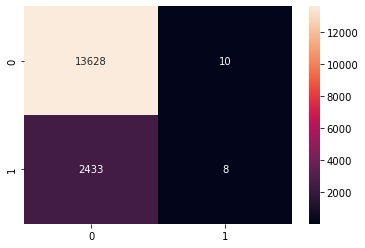

In [57]:
#Difinindo o threshold para gerar a matriz de confusão
pred =pd.DataFrame(modelo_fit.predict(x_interc),columns=['Pred'])
pred['y'] = Y_treino 
pred['Pred'] = np.where(pred.iloc[:,0] >=0.5 , 1, 0)

#Matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred['y'],pred['Pred'])
sns.heatmap(cm,annot=True,fmt='d')

In [58]:
#Acurácia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(pred['y'],pred['Pred'])
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 84.8%


**O modelo 1 é bom para prever os funcionários que permaneceram na empresa, porém não consegue prever quem pedirá demissão, isso pode ser explicado pelo desbalanceamento dos dados, para um melhor resultado o ideal é aplicar o balanceamento nos dados de treino**

# Modelo 2 - Regressão Logistica

### Vamos excluir as variáveis que não se mostraram significantes no modelo 1

In [59]:
#Separando as variáveis em X e Y
x1 = var_rh.drop(['EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical',
            'EducationField_Other','EducationField_Technical Degree','MonthlyIncome'],axis=1)
y1 = data.Attrition


#Treino e teste
X_treino,X_teste,Y_treino,Y_teste=train_test_split(x1,y1,test_size=0.3,random_state=1)

#Modelagem e treinamento
x_interc = sm.add_constant(X_treino) 
modelo1 = sm.Logit(Y_treino.astype(float),x_interc.astype(float)) 
modelo_fit1 = modelo1.fit()
modelo_fit1.summary() 

Optimization terminated successfully.
         Current function value: 0.404679
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                16079
Model:                          Logit   Df Residuals:                    16062
Method:                           MLE   Df Model:                           16
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                 0.04969
Time:                        10:51:14   Log-Likelihood:                -6506.8
converged:                       True   LL-Null:                       -6847.1
Covariance Type:            nonrobust   LLR p-value:                1.796e-134
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.9599      0.200     -9.800      0.000      -2.352      -1.568
Education                            -0.0897      0.022     -4.095      0.000      -0.133      -0.047
JobLevel                             -0.1325      0.044     -3.040      0.002      -0.218      -0.047
NumCompaniesWorked                    0.0320      0.010      3.357      0.001       0.013       0.051
DistanceFromHome                      0.0230      0.003      8.638      0.000       0.018       0.028
Department_Research & Development    -0.3232      0.123     -2.636      0.008      -0.563      -0.083
Department_Sales                      0.1199      0.126      0.950      0.342      -0.127       0.367
JobRole_Human Resources               0.2317      0.164      1.413      0.158      -0.090       0.553
JobRole_Laboratory Technician         0.4300      0.113      3.808      0.000       0.209       0.651
JobRole_Manager                      -0.1915      0.166     -1.155      0.248      -0.517       0.134
JobRole_Manufacturing Director        0.1427      0.116      1.228      0.219      -0.085       0.371
JobRole_Research Director             0.0990      0.162      0.610      0.542      -0.219       0.417
JobRole_Research Scientist            0.2335      0.114      2.046      0.041       0.010       0.457
JobRole_Sales Executive               0.1758      0.105      1.672      0.094      -0.030       0.382
JobRole_Sales Representative          0.6832      0.136      5.022      0.000       0.417       0.950
MaritalStatus_Married                 0.1585      0.065      2.442      0.015       0.031       0.286
MaritalStatus_Single                  0.7871      0.065     12.203      0.000       0.661       0.914
=====================================================================================================
"""

**Observe que todas as variáveis numéricas são significantes, e as variáveis que eram categóricas, pelo menos uma de suas categorias também tem significância estatística**

<AxesSubplot:>

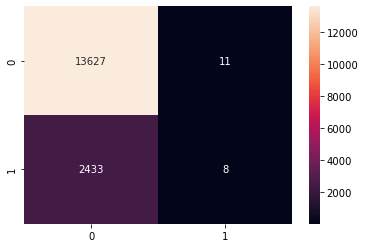

In [60]:
#Difinindo o threshold para gerar a matriz de confusão
pred1 =pd.DataFrame(modelo_fit1.predict(x_interc),columns=['Pred'])
pred1['y'] = Y_treino 
pred1['Pred'] = np.where(pred1.iloc[:,0] >=0.5 , 1, 0)

#Matriz de confusão
cm = confusion_matrix(pred1['y'],pred1['Pred'])
sns.heatmap(cm,annot=True,fmt='d')

In [61]:
#Acurácia
acuracia = accuracy_score(pred1['y'],pred1['Pred'])
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 84.8%


**Não houve uma melhora significativa entre os 2 modelos criados, porém no modelo 1 tínhamos 22 variáveis preditoras, já no modelo 2 apenas 16, já para melhorar o resultado do modelo, podemos usar outro algoritimo ou balancear os dados de treino**

# Modelo 3 - Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

#Separando as variáveis em X e Y para modelagem
x1
y = data.Attrition

#Separar as variaveis em treino e teste
X_treino,X_teste,Y_treino,Y_teste=train_test_split(x1,y,test_size=0.3,random_state=1)

# Construção do Classificador
random_forest = RandomForestClassifier() 

#Treinar o modelo com os dados de treino
modelo_random =  random_forest.fit(X_treino, Y_treino)

# Score do modelo
scores = cross_val_score(modelo_random, X_treino, Y_treino)

# Média do score
mean = scores.mean();mean  

0.9407922479360584

<AxesSubplot:>

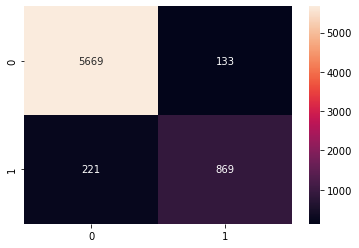

In [63]:
#Matriz de confusão
y_pred = random_forest.predict(X_teste) 
cm = confusion_matrix(Y_teste,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [64]:
#Acurácia
acuracia = accuracy_score(Y_teste,y_pred)
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 94.9%


**O Modelo 3 Random Forest teve a melhor performance dos 3 modelos, porém como esse modelo aprende demais ele pode estar sofrendo de overfitting, temos que usar os dados de teste para verificar se o modelo continua com a mesma performance**

**OBS: Note que o modelo conseguiu ter uma boa performance nas 2 classes da variável target, no qual já não era possível nos outros modelos**

In [65]:
# Score do modelo de teste
scores = cross_val_score(modelo_random, X_teste, Y_teste)

# Média do score
mean = scores.mean();mean  

0.9023503074839155

**Observe que com os dados de teste a acuracia do modelo foi um pouco menor, porém continua tendo uma ótima performance com 90% de acuracia, sendo que nos outros modelos não passava de 85% com dados de treino**

# Conclusão:

**A Analise Exploratória se mostrou mais uma vez o ponto chave para chegar no melhor resultado final, primeiramente fizemos engenharia de atributos criando variáveis que poderia ser útil para a modelagem e usamos o algoritimo Random Forest na análise exploratória para selecionar as melhores features, depois fizemos mais um filtro usando a relevância das variáveis selecionadas em relação a variável target, na modelagem preditiva usamos 2 algoritimos diferentes de machine learning para alcançar o melhor resultado, ficou faltando aplicar o balanceamento nos dados para conseguir uma performance ainda melhor, porém o modelo preditivo não é o principal fator para esse projeto e sim entender cada variável  e como ela pode contribuir na hora do processo seletivo**  

**OBS: Quando usamos variáveis categóricas temos que tomar cuidado para não cometermos ponderação arbitraria, one-hot-encoding é a melhor maneira de tratar esses tipos de dados na hora da modelagem**  